In [1]:
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import MeanIoU
import os
from glob import glob
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [3]:
input_dir = "../Dataset/images/"
mask_dir = "../Dataset/labels/"
n_classes = 4

train_images = []
for directory_path in glob(input_dir):
    for img_path in glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)
        train_images.append(img)
        
train_images = np.array(train_images)

train_masks = []
for directory_path in glob(mask_dir):
    for mask_path in glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)
        train_masks.append(mask)

train_masks = np.array(train_masks)

train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks, axis=3)

X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state=42)

train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

print("Class values in the dataset are ...", np.unique(y_train))

Class values in the dataset are ... [0 1 2 3]


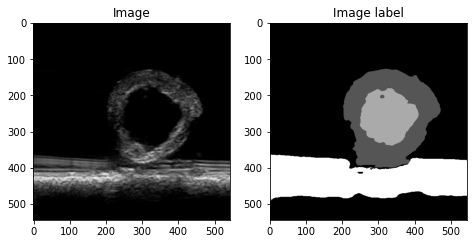

In [11]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Image label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
save_name = './example-of-dataset.png'
plt.savefig(save_name)